# Generating residual visibilities

The visibilities measured by any antenna pair $(i,j)$ is given by
\begin{equation}
V_{ij}(t, \nu) = g_i^og_j^{o*}V_{ij}^{\prime}(t,\nu)
\end{equation}

where $V_{ij}^{\prime}$ is the model visibilities and $g_i^o$ is the antenna gain as a function of time $t$ frequency $\nu$. The model visibilities $V_{ij}^{\prime}$ and antenna gain $g_i^o$ are obtained through redundant calibration, a technique which uses the property that redundant baseline measures the same cross-correlated products:

\begin{equation}
\chi^2 = \sum_{bl}|V_{ij} - g_i^og_j^{o*}V_{ij}^{\prime}(t,\nu)|^2.
\end{equation}


However, the overall phase and amplitude of the visibilities are still unknown. Therefore we used traditional sky-based calibration, whereby a sky model is required, to slove for the phase and amplitude degeneracies. The absolute calibrated visibilty can be expressed as

\begin{align}
V_{ij}^c &= \frac{V_{ij}}{\tilde{g}_i\tilde{g}_j^*}\\
         &= \frac{V_{ij}}{g_i^og_j^{o*} \times g_i^ag_j^{a*}}
\end{align}

where $g_i^a$ are the absolute gain solutions.

The model visibilities are not absolutely calibrated since they are computed from redundant calibration (omnical), therefore the absolutely calibrated model visibilites are equal to

\begin{equation}
V_{ij}^{\prime a} = \frac{V_{ij}^{\prime} \times g_i^og_j^{o*}}{g^a_ig^a_j}
\end{equation}

The residual visibilities are thus constructed using
\begin{equation}
V_{ij}^r(t, \nu) = V_{ij}^c(t, \nu) - V_{ij}^{\prime a}
\end{equation} 

This example shows how to generate residual visibilities given the calibrated dataset and model visibilities obtained from redundant calibration. Here we used one dataset for IDR2.1, 2458115.31193.

In [1]:
%matplotlib notebook
from beam_solver import generate_resvis as gr
from beam_solver import get_redbls as gb
import hera_cal as hc
import numpy as np
import pylab
import os
import uvtools

In [2]:
DATA_PATH = '/Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data'

## Loading uvfile 

In [3]:
uvfile = os.path.join(DATA_PATH, 'zen.2458115.31193.xx.HH.uvOCR')

In [4]:
uvd = gr.read_uvfile(uvfile)

Extracting all the redundant group of baselines

In [6]:
ant_dict = gr.generate_antdict(uvd)
red_bls = hc.redcal.get_reds(ant_dict)
red = gb.RBL(red_bls)

Choosing the redundant group of baseline with the antenna pair or baseline (11,12) in it

In [7]:
bl = (11, 12)
key = (11, 12, 'xx')
bl_grp = red[key]
nbls = len(bl_grp)
print ('Number of redundant baselines: {}'.format(nbls))
print (bl_grp)

Number of redundant baselines: 42
[(0, 1, 'xx'), (1, 2, 'xx'), (11, 12, 'xx'), (12, 13, 'xx'), (13, 14, 'xx'), (23, 24, 'xx'), (24, 25, 'xx'), (25, 26, 'xx'), (26, 27, 'xx'), (36, 37, 'xx'), (37, 38, 'xx'), (38, 39, 'xx'), (39, 40, 'xx'), (40, 41, 'xx'), (50, 51, 'xx'), (51, 52, 'xx'), (52, 53, 'xx'), (53, 54, 'xx'), (54, 55, 'xx'), (65, 66, 'xx'), (66, 67, 'xx'), (67, 68, 'xx'), (68, 69, 'xx'), (69, 70, 'xx'), (70, 71, 'xx'), (82, 83, 'xx'), (83, 84, 'xx'), (84, 85, 'xx'), (85, 86, 'xx'), (86, 87, 'xx'), (87, 88, 'xx'), (120, 121, 'xx'), (121, 122, 'xx'), (122, 123, 'xx'), (123, 124, 'xx'), (136, 137, 'xx'), (137, 138, 'xx'), (138, 139, 'xx'), (139, 140, 'xx'), (140, 141, 'xx'), (141, 142, 'xx'), (142, 143, 'xx')]


In [8]:
# lst array
lst = uvd.lst_array

Plotting amplitude and phase of all the baselines from the chosen redundant group

<IPython.core.display.Javascript object>


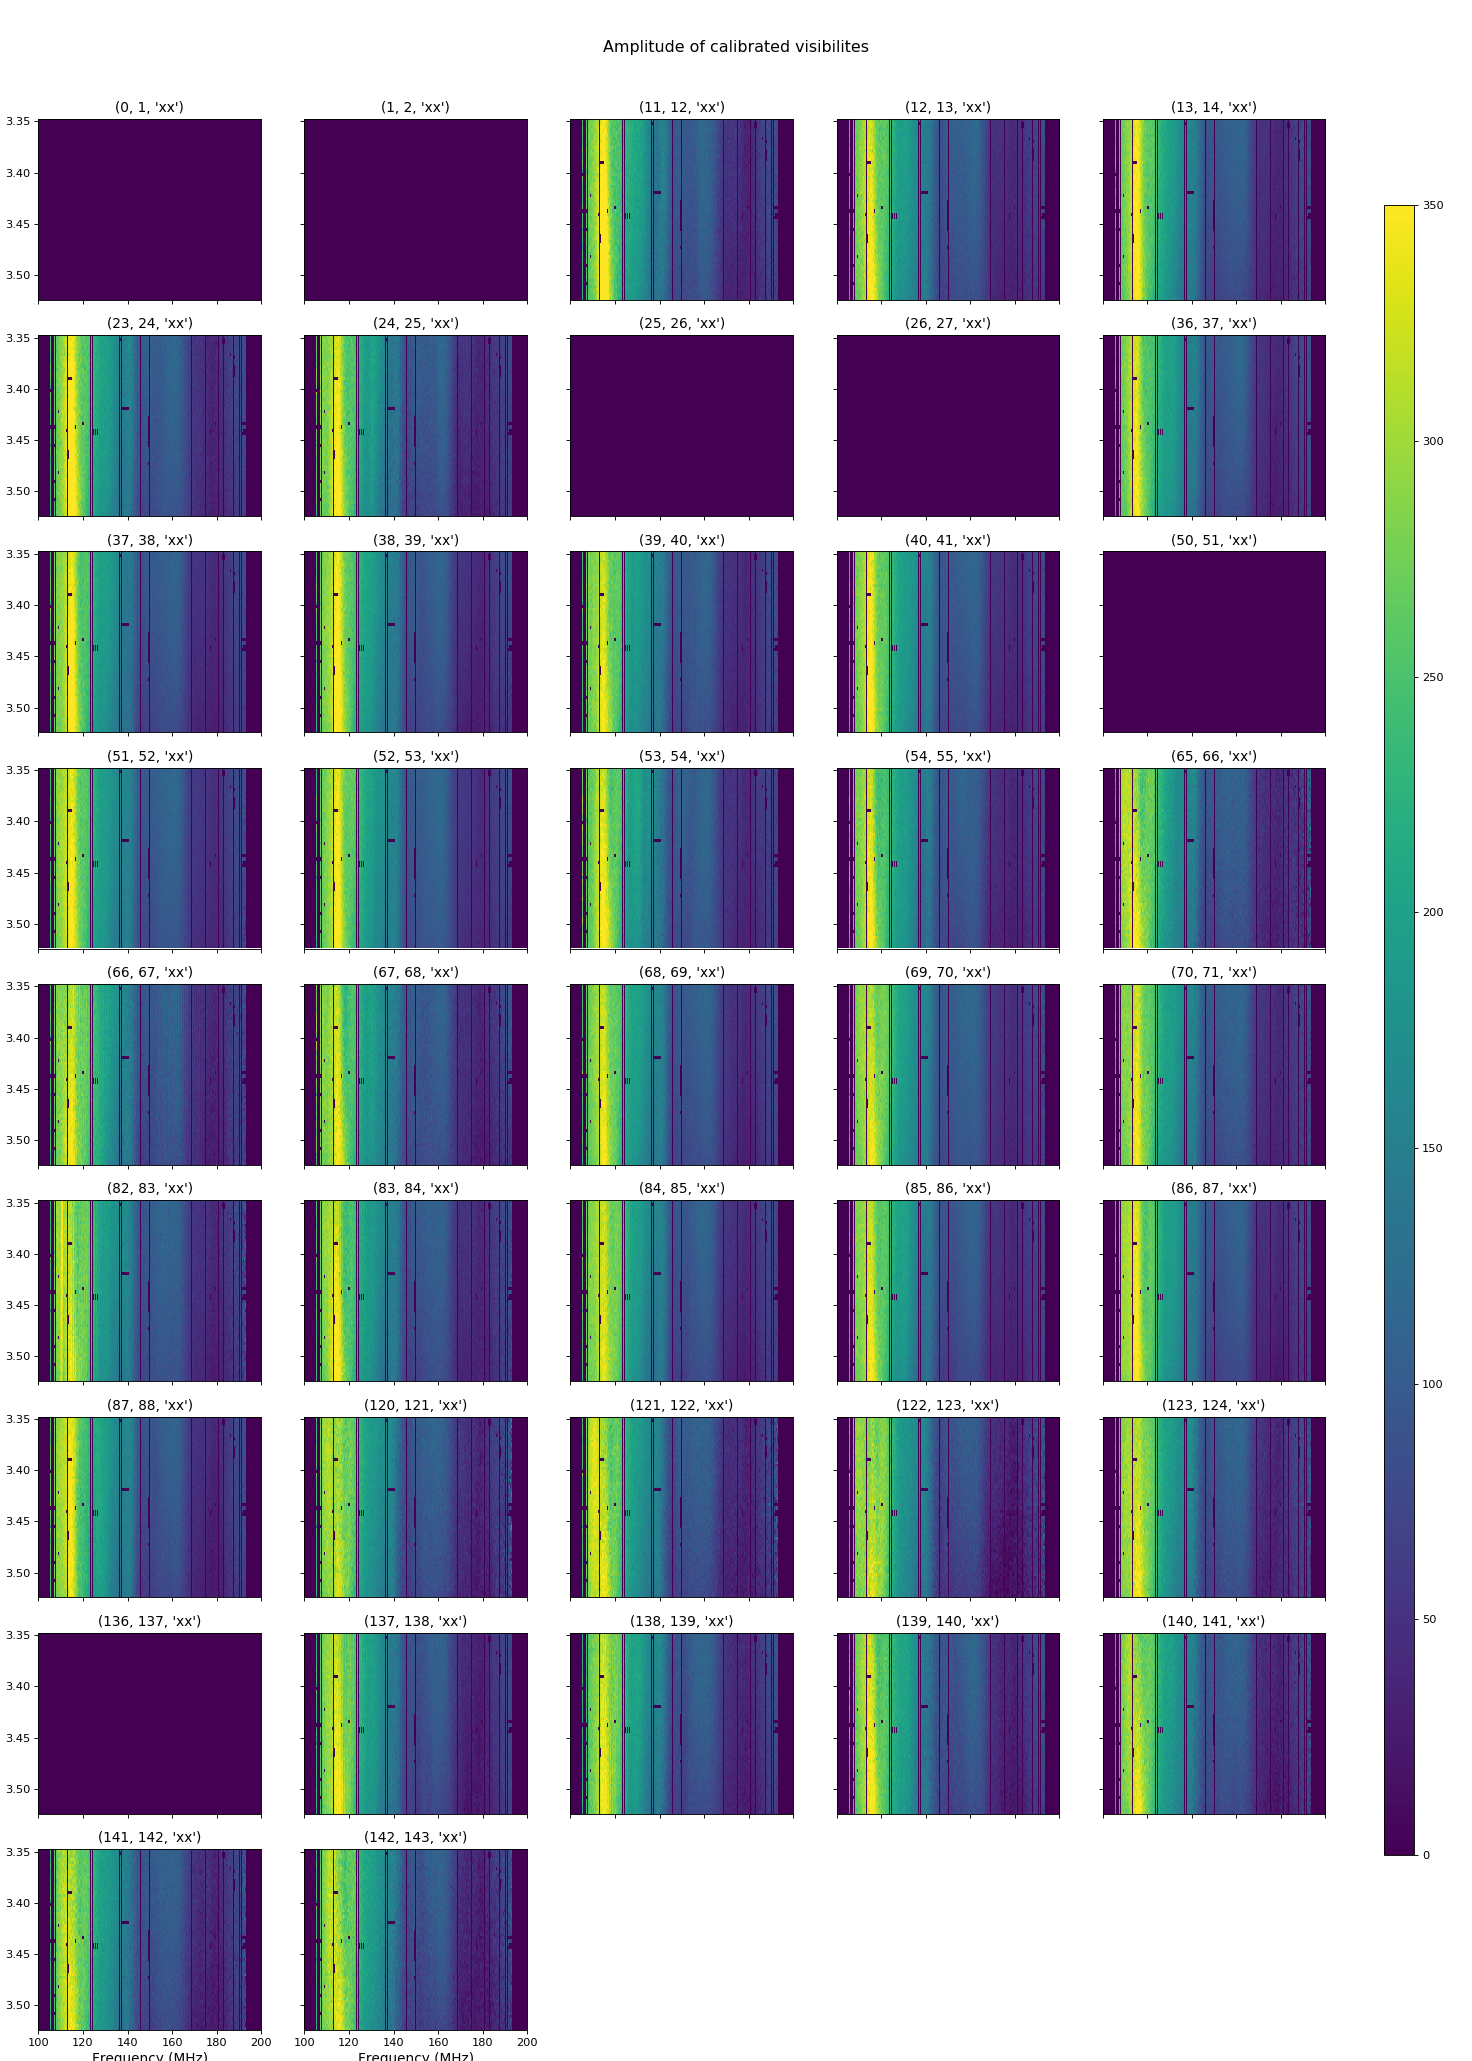

In [9]:
Nside = 5 
Yside = int(np.ceil(float(nbls)/Nside))
fig, axes = pylab.subplots(Yside, Nside, figsize=(18, 14*float(Yside)/Nside), dpi=75)
fig.suptitle("Amplitude of calibrated visibilites", fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
k = 0
freqs = np.linspace(100,200,1024)
lst_hrs = lst * 12/np.pi
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        if  k < nbls:
            blp =  bl_grp[k]
            ax.set_title(bl)
            pylab.sca(ax)
            im = uvtools.plot.waterfall(uvd.get_data(blp)* ~uvd.get_flags(blp), mode='lin', mx=350,drng=350,  extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
            ax.xaxis.set_ticks_position('bottom')
            ax.set_title(blp)
        else:
            ax.axis('off')

        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_yticklabels()]
            ax.set_ylabel('LST (hrs)', fontsize=12)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            ax.set_xlabel('Frequency (MHz)', fontsize=12)
        k += 1 
        
fig.subplots_adjust(right=0.90)
cax = fig.add_axes([0.94, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cax)

<IPython.core.display.Javascript object>


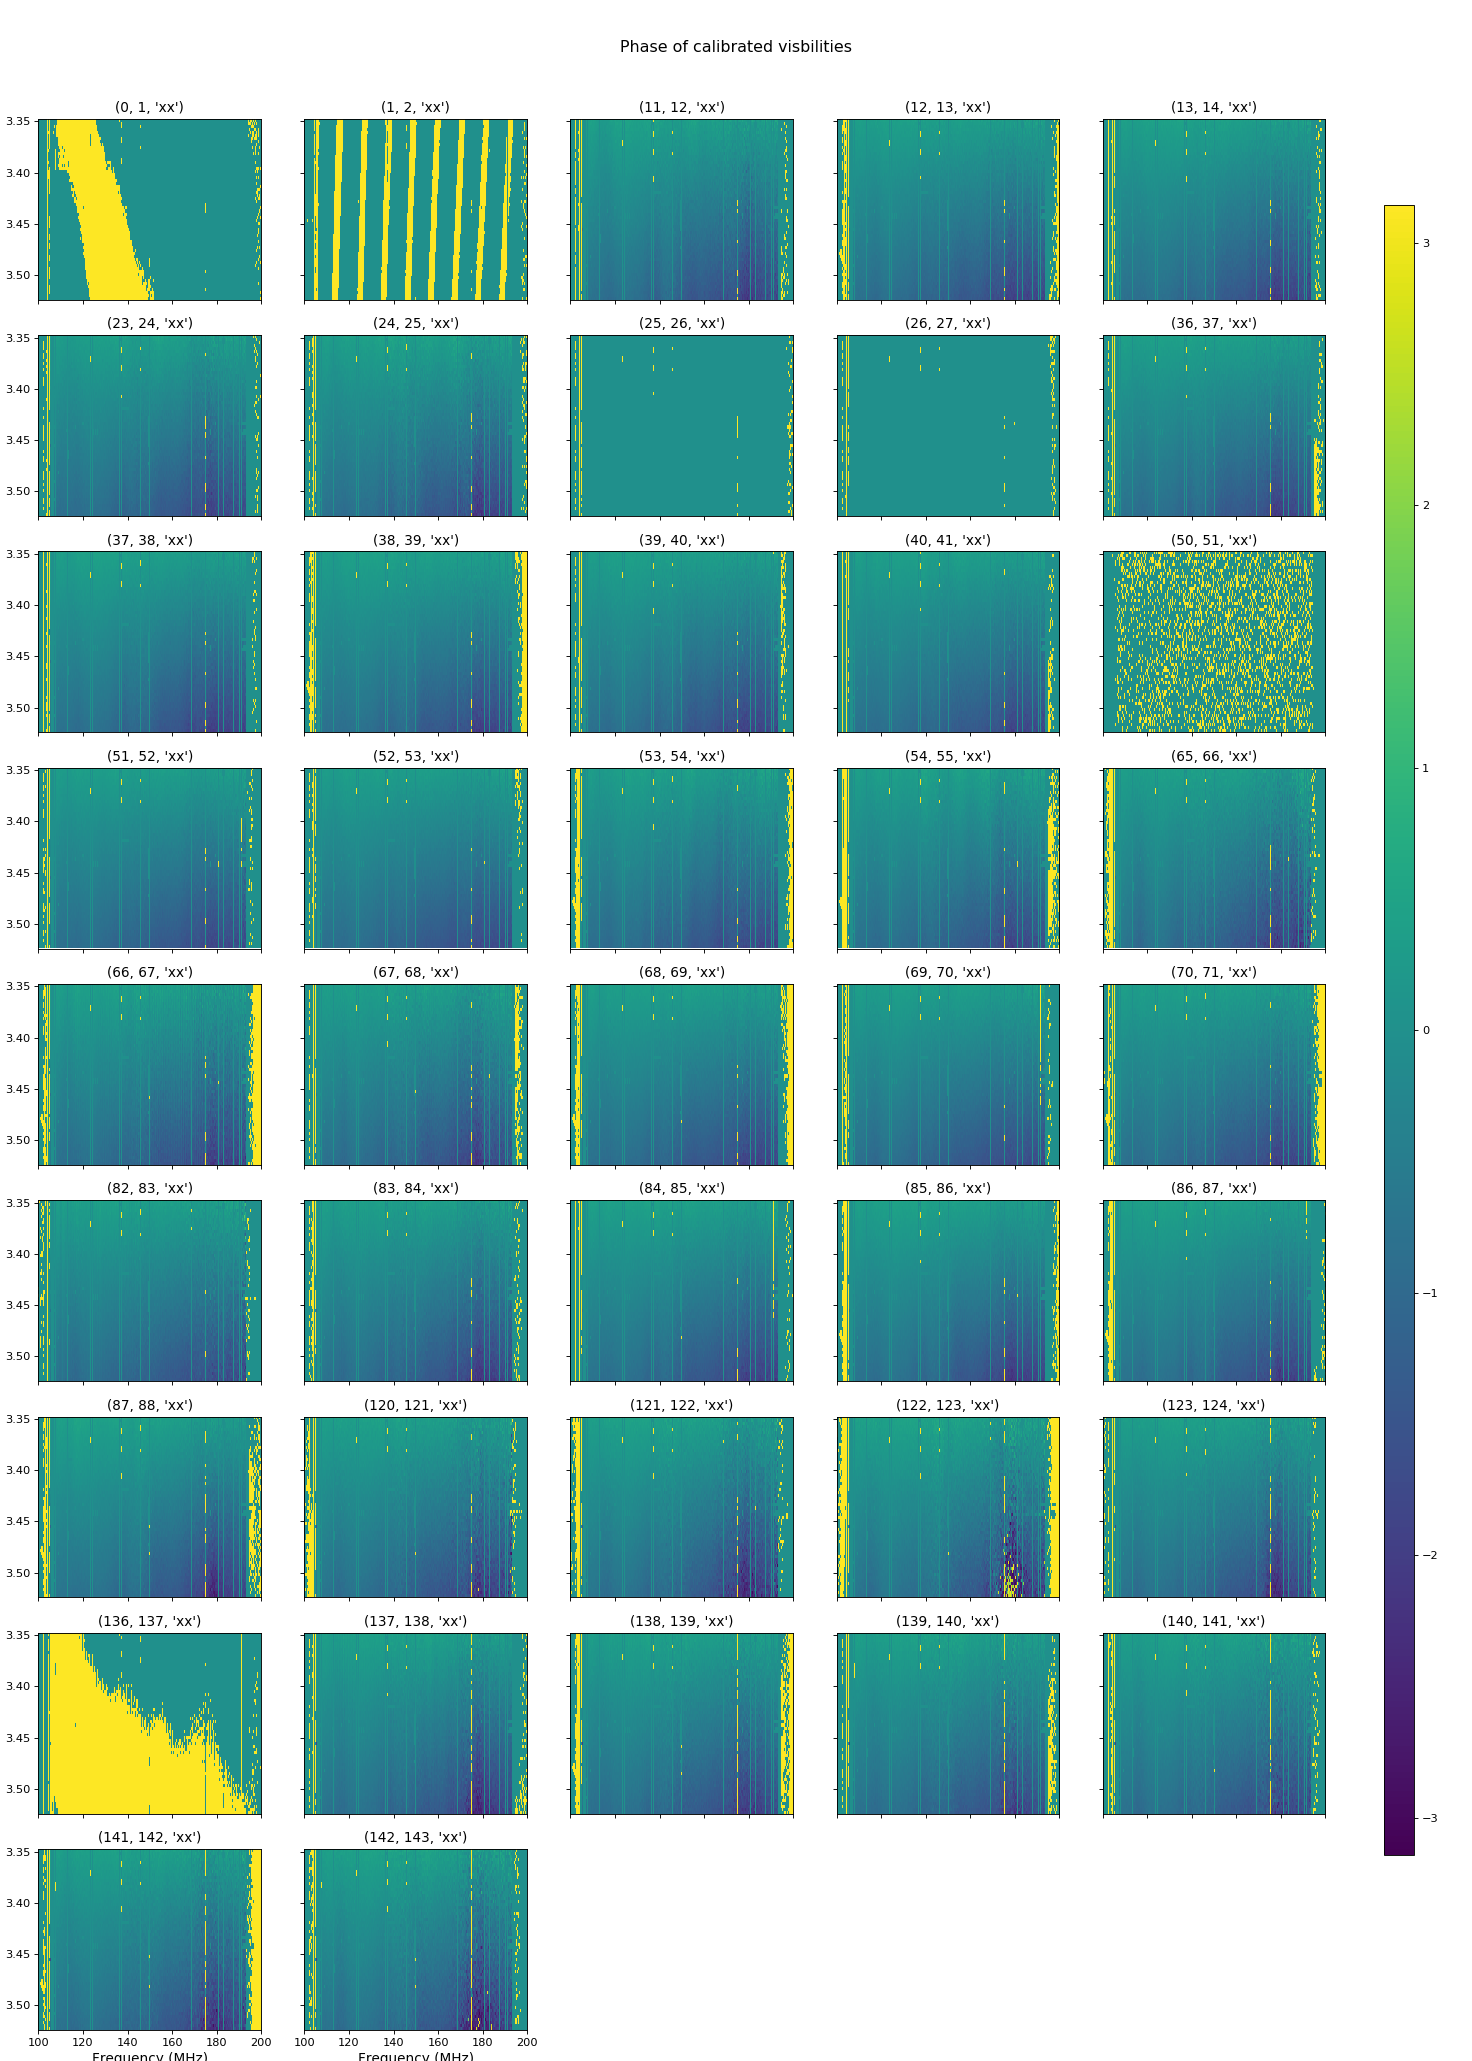

In [10]:
Nside = 5
Yside = int(np.ceil(float(nbls)/Nside))
fig, axes = pylab.subplots(Yside, Nside, figsize=(18, 14*float(Yside)/Nside), dpi=75)
fig.suptitle("Phase of calibrated visbilities", fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
k = 0
freqs = np.linspace(100,200,1024)
lst_hrs = lst * 12/np.pi
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        if  k < nbls:
            blp =  bl_grp[k]
            ax.set_title(bl)
            plot_data = np.angle(uvd.get_data(blp))
            pylab.sca(ax)
            im = uvtools.plot.waterfall(uvd.get_data(blp)* ~uvd.get_flags(blp), mode='phs', mx=np.pi,drng=2*np.pi,  extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
            ax.xaxis.set_ticks_position('bottom')
            ax.set_title(blp)
        else:
            ax.axis('off')

        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_yticklabels()]
            ax.set_ylabel('LST (hrs)', fontsize=12)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            ax.set_xlabel('Frequency (MHz)', fontsize=12)
        k += 1 
        
fig.subplots_adjust(right=0.90)
cax = fig.add_axes([0.94, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cax)

## Loading model visibilities and calibration solutions

In [13]:
# loading model visibilities
uvfits = os.path.join(DATA_PATH, 'zen.2458115.31193.xx.HH.uv.vis.uvfits')
uvm = gr.read_uvfits(uvfits)

<IPython.core.display.Javascript object>


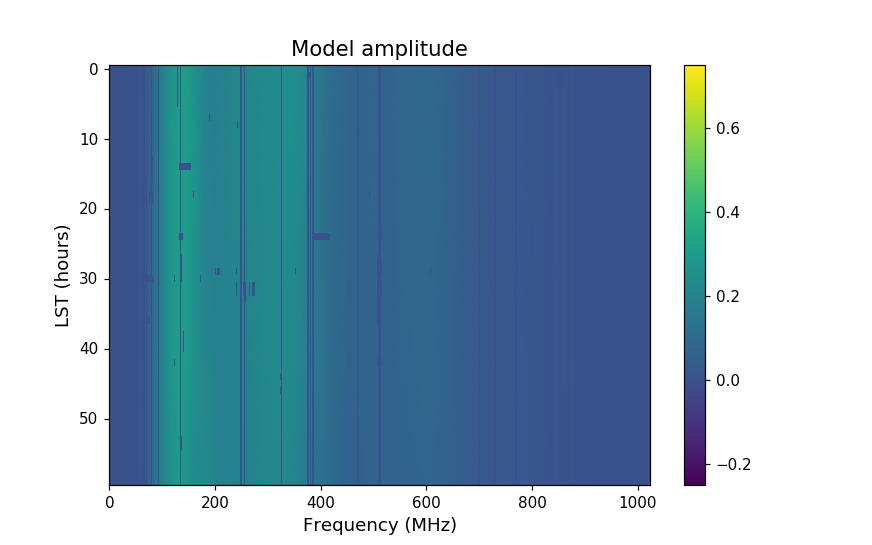

In [14]:
fig = pylab.figure(figsize=(8,5))
freqs = np.linspace(100,200,1024)
bl=(69, 71)
ax = pylab.subplot(111)
im = uvtools.plot.waterfall(uvm.get_data(bl) * ~uvd.get_flags(bl), mode='lin', mx=0.75,drng=1) # extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
ax.xaxis.set_ticks_position('bottom')
pylab.colorbar(im)
pylab.title("Model amplitude", fontsize=14)
pylab.ylabel('LST (hours)',fontsize=12)
pylab.xlabel('Frequency (MHz)',fontsize=12)
pylab.tick_params(labelsize=10)

In [15]:
# loading calibration solutions
omni_calfits = os.path.join(DATA_PATH, 'zen.2458115.31193.xx.HH.uv.omni.calfits')
abs_calfits = os.path.join(DATA_PATH, 'zen.2458115.31193.xx.HH.uv.abs.calfits')
omnigains, omniflags = gr.read_calfits(omni_calfits)
absgains, absflags = gr.read_calfits(abs_calfits)

In [16]:
# absolute calibration the model visibilities
bl = (11, 12)
data_m = uvm.get_data(bl).copy()
data_m *= omnigains[bl[0],'Jxx'] * np.conj(omnigains[bl[1],'Jxx'])
data_m /=  absgains[bl[0],'Jxx']  *  np.conj(absgains[bl[1],'Jxx'])

<IPython.core.display.Javascript object>


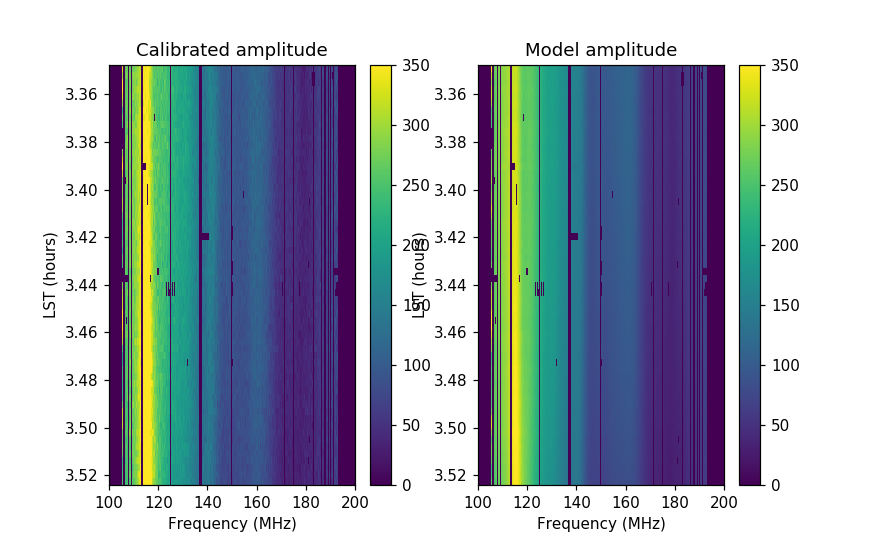

In [17]:
data_11_12 = uvd.get_data(bl) * ~uvd.get_flags(bl)
moddata_11_12 = data_m * ~uvd.get_flags(bl)

fig = pylab.figure(figsize=(8,5))
freqs = np.linspace(100,200,1024)
ax1 = pylab.subplot(121)
im = uvtools.plot.waterfall(data_11_12, mode='lin', mx=350 ,drng=350, extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
ax1.xaxis.set_ticks_position('bottom')
pylab.colorbar(im)
pylab.title("Calibrated amplitude", fontsize=12)
pylab.ylabel('LST (hours)',fontsize=10)
pylab.xlabel('Frequency (MHz)',fontsize=10)
pylab.tick_params(labelsize=10)

ax2 = pylab.subplot(122)
im = uvtools.plot.waterfall(moddata_11_12, mode='lin', mx=350 ,drng=350, extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
ax2.xaxis.set_ticks_position('bottom')
pylab.colorbar(im)
pylab.title("Model amplitude", fontsize=12)
pylab.ylabel('LST (hours)',fontsize=10)
pylab.xlabel('Frequency (MHz)',fontsize=10)
pylab.tick_params(labelsize=10)

<IPython.core.display.Javascript object>


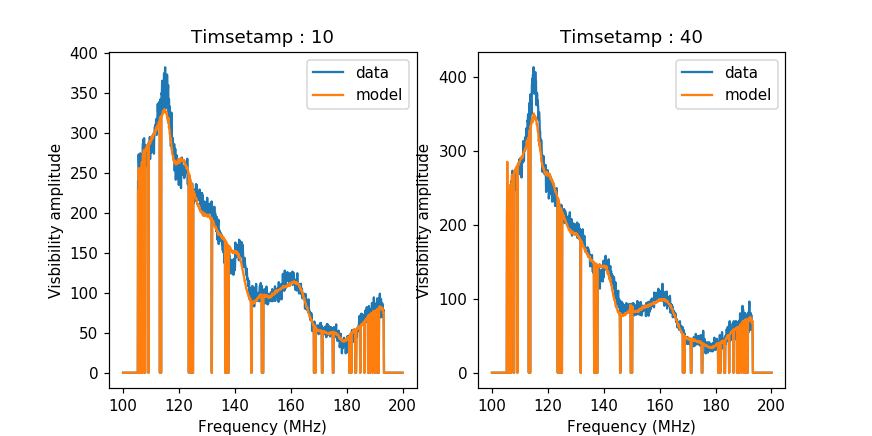

Text(0.5, 1.0, 'Timsetamp : 40')

In [18]:
fig = pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.plot(freqs, np.abs(data_11_12[10, :]), label='data')
pylab.plot(freqs, np.abs(moddata_11_12[10, :]), label='model')
pylab.legend()
pylab.xlabel('Frequency (MHz)',fontsize=10)
pylab.ylabel('Visbibility amplitude', fontsize=10)
pylab.title('Timsetamp : 10', size=12)

pylab.subplot(122)
pylab.plot(freqs, np.abs(data_11_12[40, :]), label='data')
pylab.plot(freqs, np.abs(moddata_11_12[40, :]), label='model')
pylab.legend()
pylab.xlabel('Frequency (MHz)',fontsize=10)
pylab.ylabel('Visbibility amplitude', fontsize=10)
pylab.title('Timsetamp : 40', size=12)

## Generating residual visibilities 

In [19]:
# name of the output residual uvfile
outfile = os.path.join(DATA_PATH, 'zen.2458115.31193.xx.HH.uvOCR.res')

In [20]:
# generating residual visibilites
pol ='xx'
gr.generate_residual(uvfile, uvfits, omni_calfits, abs_calfits, pol, outfile=outfile, clobber=True)

File exists: clobbering


In [21]:
uvr = gr.read_uvfile(outfile)

Plotting amplitude and phase of the residual visibilities

<IPython.core.display.Javascript object>


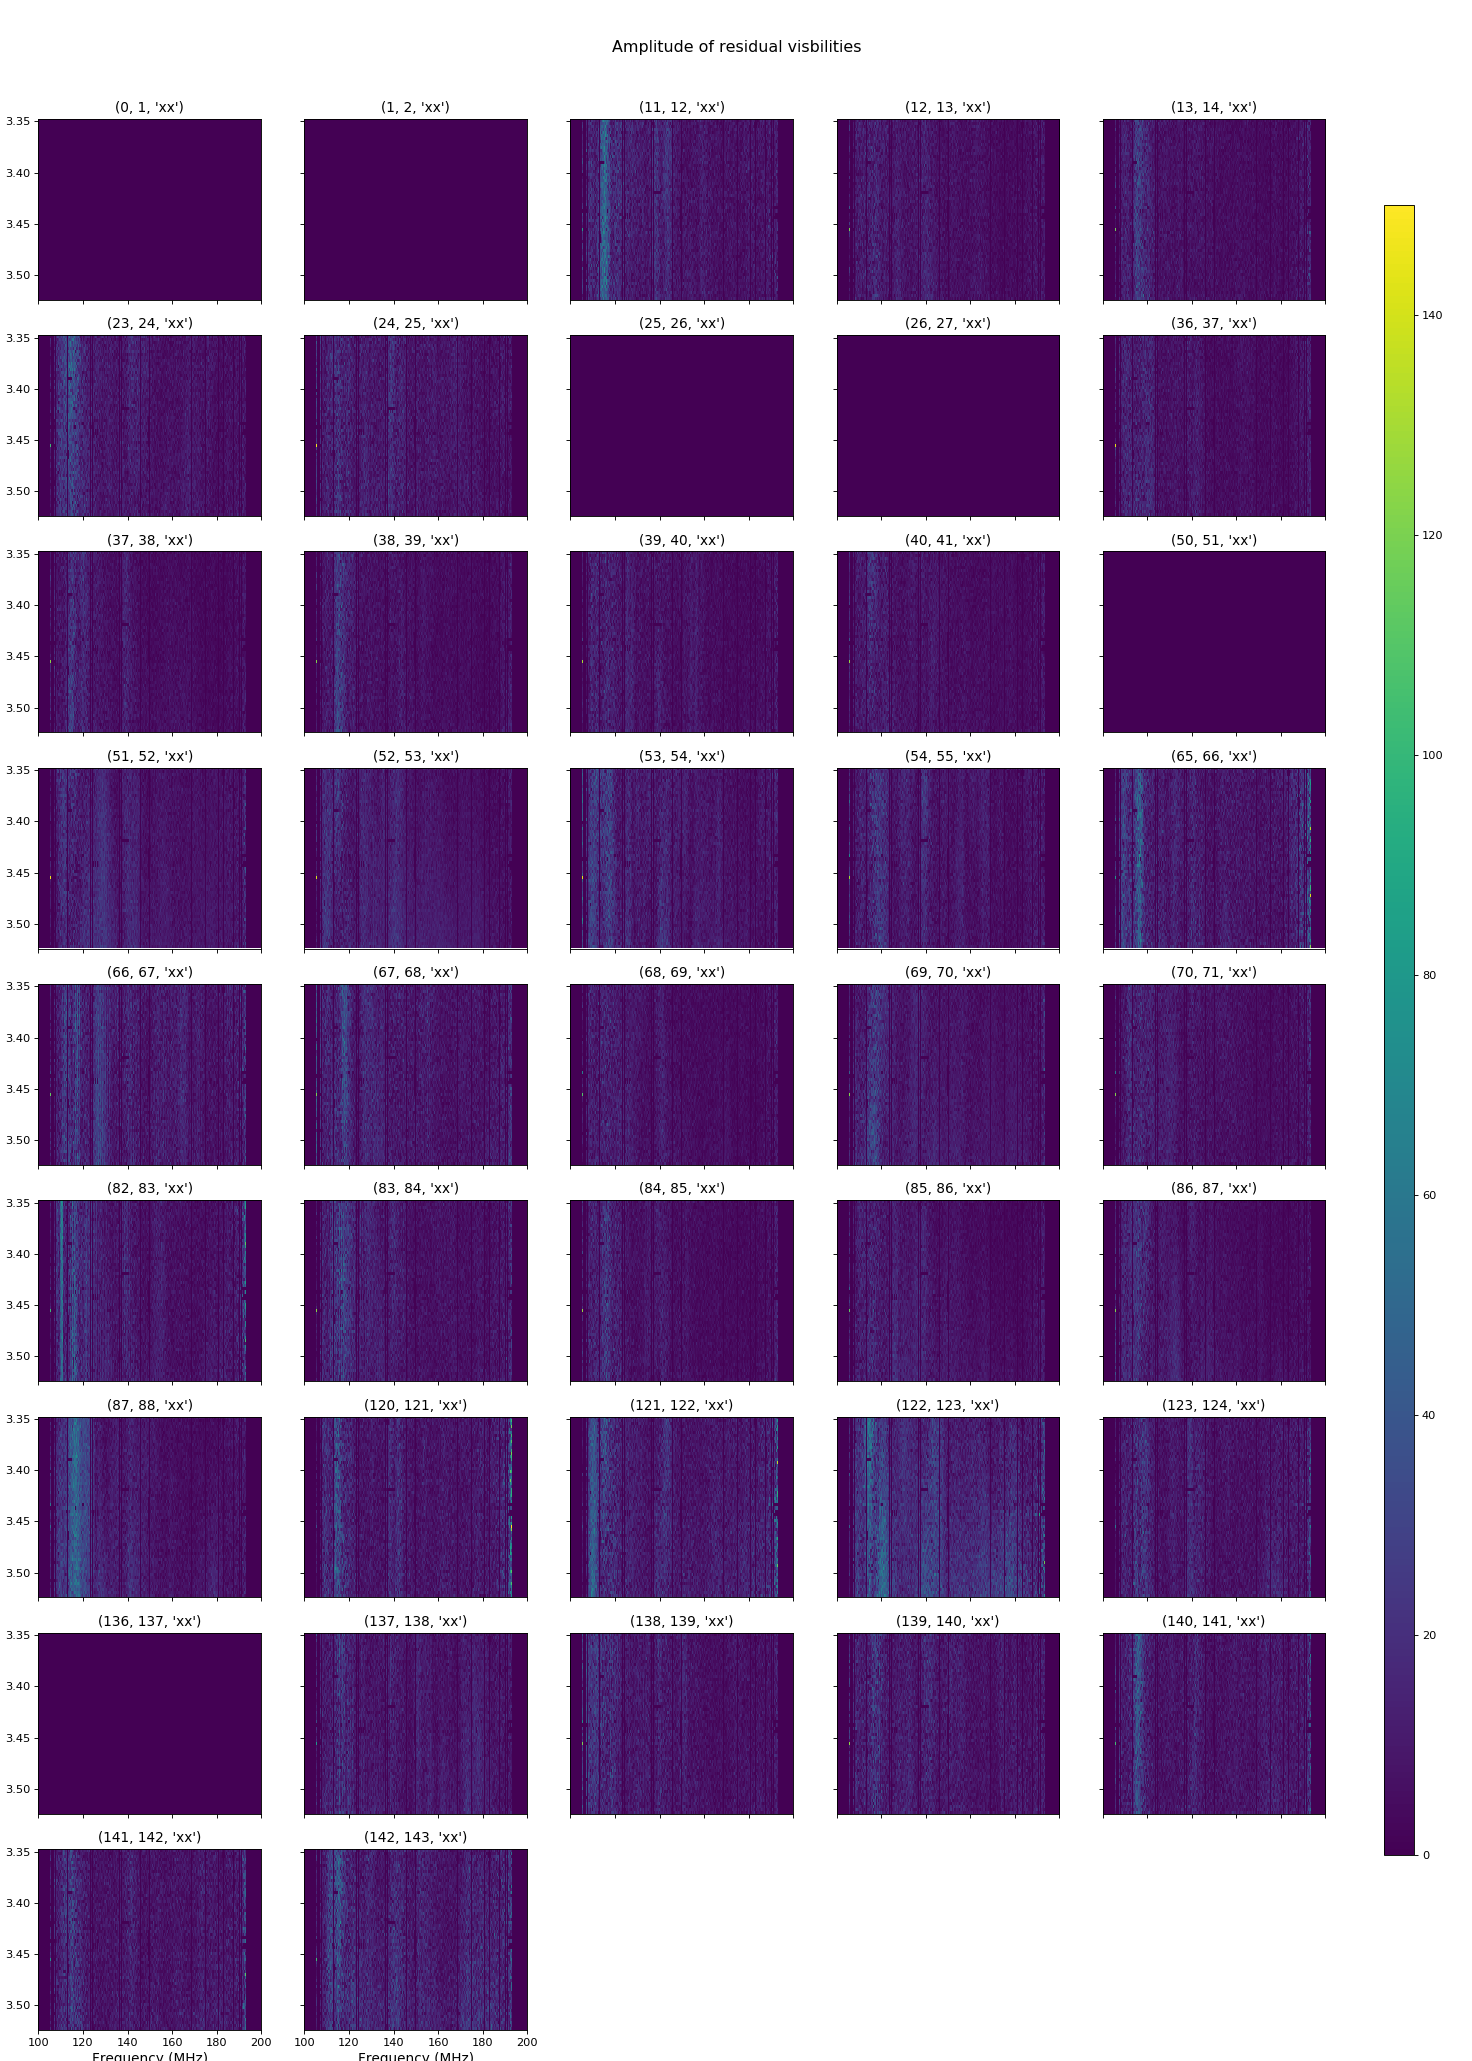

In [22]:
Nside = 5
Yside = int(np.ceil(float(nbls)/Nside))
fig, axes = pylab.subplots(Yside, Nside, figsize=(18, 14*float(Yside)/Nside), dpi=75)
fig.suptitle("Amplitude of residual visbilities", fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
k = 0
freqs = np.linspace(100,200,1024)
lst_hrs = lst * 12/np.pi
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        if  k < nbls:
            blp =  bl_grp[k]
            ax.set_title(bl)
            pylab.sca(ax)
            im = uvtools.plot.waterfall(uvr.get_data(blp)* ~uvr.get_flags(blp), mode='lin', mx=150,drng=150, extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
            ax.xaxis.set_ticks_position('bottom')
            ax.set_title(blp)
        else:
            ax.axis('off')

        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_yticklabels()]
            ax.set_ylabel('LST (hrs)', fontsize=12)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            ax.set_xlabel('Frequency (MHz)', fontsize=12)
        k += 1 
        
fig.subplots_adjust(right=0.90)
cax = fig.add_axes([0.94, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cax)

<IPython.core.display.Javascript object>


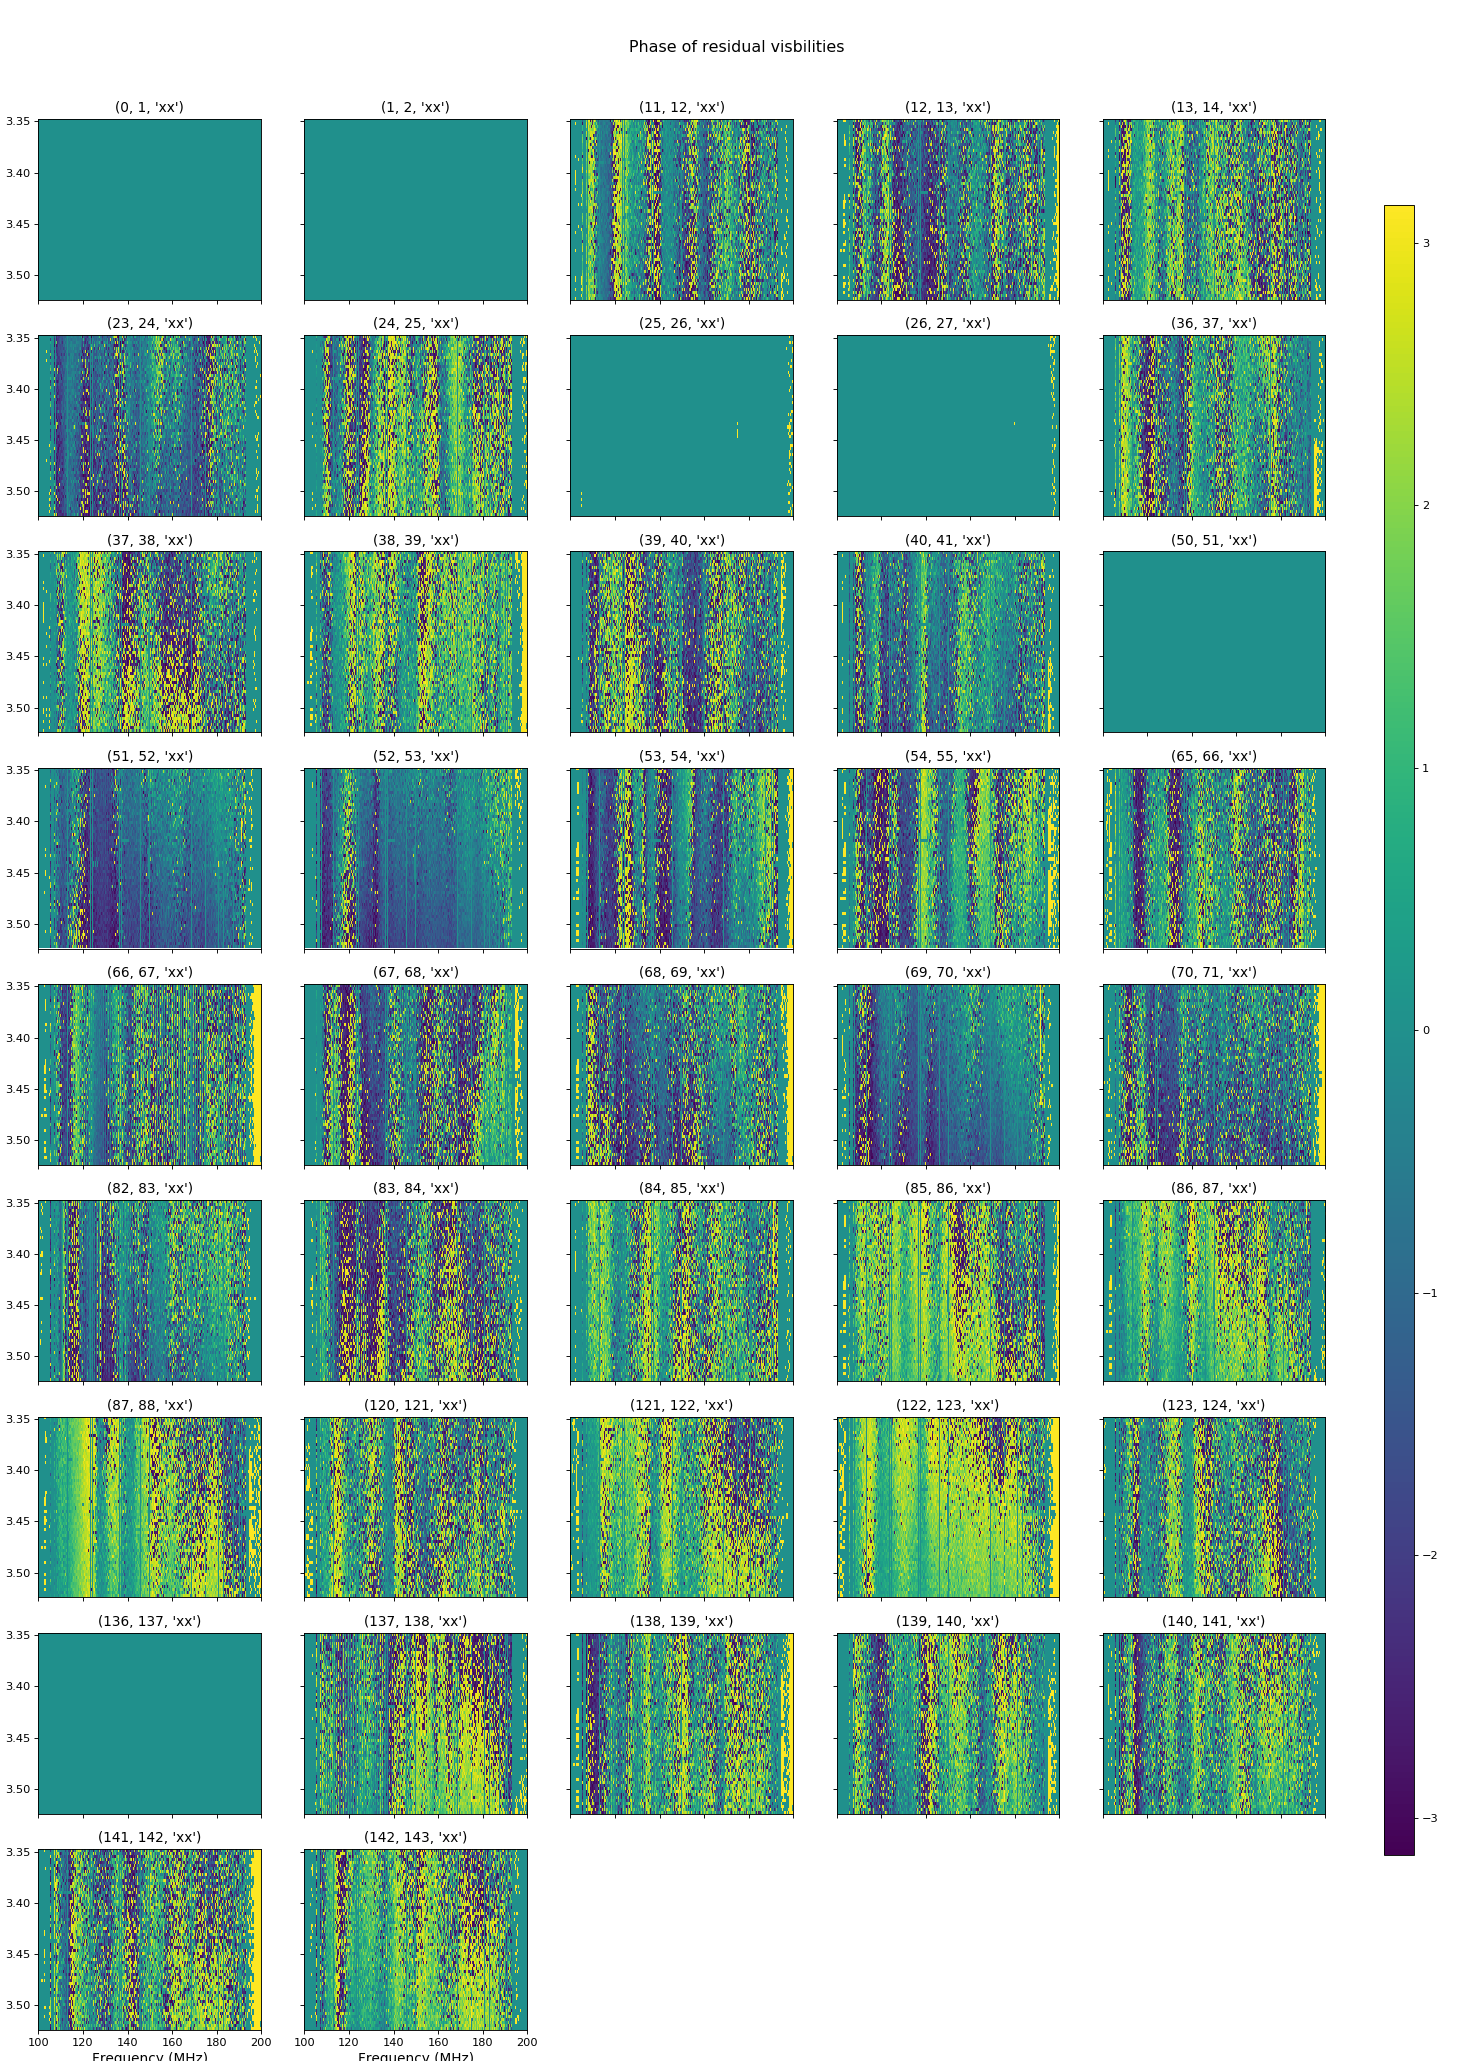

In [23]:
Nside = 5
Yside = int(np.ceil(float(nbls)/Nside))
fig, axes = pylab.subplots(Yside, Nside, figsize=(18, 14*float(Yside)/Nside), dpi=75)
fig.suptitle("Phase of residual visbilities", fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
k = 0
freqs = np.linspace(100,200,1024)
lst_hrs = lst * 12/np.pi
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        if  k < nbls:
            blp =  bl_grp[k]
            ax.set_title(bl)
            pylab.sca(ax)
            im = uvtools.plot.waterfall(uvr.get_data(blp)* ~uvr.get_flags(blp), mode='phs', mx=np.pi,drng=2*np.pi,  extent=(100,200, lst_hrs[-1],lst_hrs[0]),)
            ax.xaxis.set_ticks_position('bottom')
            ax.set_title(blp)
        else:
            ax.axis('off')

        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_yticklabels()]
            ax.set_ylabel('LST (hrs)', fontsize=12)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            ax.set_xlabel('Frequency (MHz)', fontsize=12)
        k += 1 
        
fig.subplots_adjust(right=0.90)
cax = fig.add_axes([0.94, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cax)

<IPython.core.display.Javascript object>


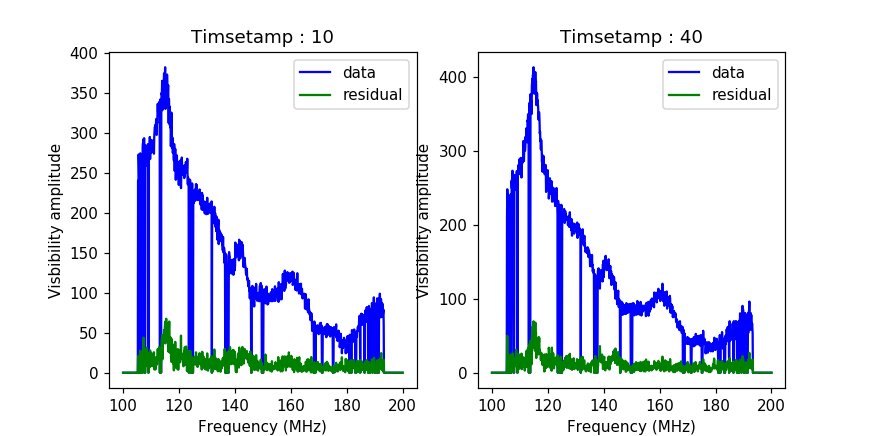

Text(0.5, 1.0, 'Timsetamp : 40')

In [24]:
data_11_12 = uvd.get_data(bl) * ~uvd.get_flags(bl)
resdata_11_12 = uvr.get_data(bl) * ~uvr.get_flags(bl)

fig = pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.plot(freqs, np.abs(data_11_12[10, :]), color='blue', label='data')
pylab.plot(freqs, np.abs(resdata_11_12[10, :]), color='green', label='residual')
pylab.legend()
pylab.xlabel('Frequency (MHz)',fontsize=10)
pylab.ylabel('Visbibility amplitude', fontsize=10)
pylab.title('Timsetamp : 10', size=12)

pylab.subplot(122)
pylab.plot(freqs, np.abs(data_11_12[40, :]), color='blue', label='data')
pylab.plot(freqs, np.abs(resdata_11_12[40, :]), color='green', label='residual')
pylab.legend()
pylab.xlabel('Frequency (MHz)',fontsize=10)
pylab.ylabel('Visbibility amplitude', fontsize=10)
pylab.title('Timsetamp : 40', size=12)